<a href="https://colab.research.google.com/github/dcovarru/Python/blob/master/Application_Investments_dev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generation of Investment Data with Python
## Author: Daniel Covarrubias

In [ ]:
########################
#
# 1) Identify Symbols form API dumbstock
# 2) Pull daily Price Data for last 365 days via Yahoo
# 3) Identify Metric(s)
# 4) Identify correlations/significance
# 5) Build Historical Model on Training Set
# 6) Test Model on recent data
# 7) Use TF or sklearn
# 8) Build App on AWS or GCP to monitor realtime data
#
########################

In [1]:
########################
# Load packages 
########################

import pandas as pd
import datetime
import numpy as np
import pandas_datareader
import pandas_datareader.data as web
from pandas_datareader.data import get_quote_yahoo
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
from pandas.plotting import scatter_matrix
import os
import re
import plotly.figure_factory as ff
import plotly as py
import plotly.offline as offline
import plotly.graph_objects as go
import plotly.express as px
from google.colab import drive
import io

import seaborn as sns
%matplotlib inline


In [3]:
# Colab feature to install alpha_vantage every time
# GRR

!pip install alpha_vantage


     |████████████████████████████████| 1.3MB 11.3MB/s 
     |████████████████████████████████| 143kB 50.6MB/s 
     |████████████████████████████████| 296kB 51.3MB/s 
  Created wheel for idna-ssl: filename=idna_ssl-1.1.0-cp36-none-any.whl size=3163 sha256=97b6e6c519dcd56171027c9b780d5ee47b5d5cea387dada505cf2d2b729e27e7
  Stored in directory: /root/.cache/pip/wheels/d3/00/b3/32d613e19e08a739751dd6bf998cfed277728f8b2127ad4eb7
Successfully built idna-ssl


In [5]:
# https://github.com/RomelTorres/alpha_vantage

# Test Alpha_Vantage pull

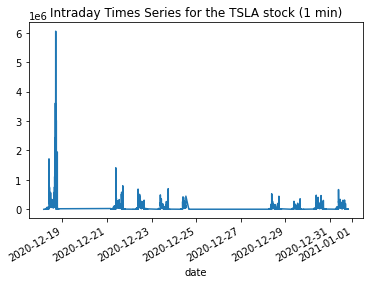

In [6]:
 # API KEY: ANBKAAOU9YDNYBRV

ts = TimeSeries(key='ANBKAAOU9YDNYBRV', output_format='pandas')
data, meta_data = ts.get_intraday(symbol='TSLA', interval='1min', outputsize='full')
data['5. volume'].plot()
plt.title('Intraday Times Series for the TSLA stock (1 min)')
plt.show()

In [7]:
data.reset_index(inplace=True)

In [10]:
data[(data['date'] >= '2020-12-18 00:00:00')].head(50)

,date,1. open,2. high,3. low,4. close,5. volume
0,2020-12-31 20:00:00,704.6900,704.7000,704.5000,704.5000,2435.0
1,2020-12-31 19:59:00,704.5000,704.7000,704.5000,704.7000,5691.0
2,2020-12-31 19:58:00,704.4800,704.5000,704.4800,704.5000,2642.0
3,2020-12-31 19:57:00,704.4000,704.4700,704.4000,704.4000,1453.0
4,2020-12-31 19:54:00,704.3500,704.4700,704.3500,704.3500,2701.0
5,2020-12-31 19:53:00,704.3501,704.4700,704.3501,704.4700,680.0
6,2020-12-31 19:52:00,704.4000,704.4000,704.3500,704.3500,1063.0
7,2020-12-31 19:51:00,704.4000,704.4900,704.4000,704.4900,731.0
8,2020-12-31 19:50:00,704.4300,704.4800,704.4300,704.4800,1073.0
9,2020-12-31 19:49:00,704.4200,704.5000,704.4200,704.5000,862.0


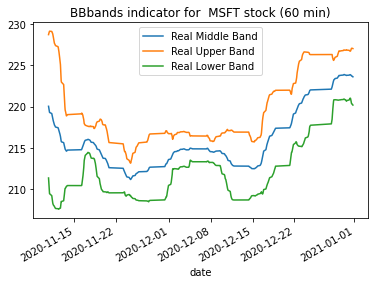

In [11]:
from alpha_vantage.techindicators import TechIndicators
import matplotlib.pyplot as plt

ti = TechIndicators(key='YOUR_API_KEY', output_format='pandas')
data, meta_data = ti.get_bbands(symbol='MSFT', interval='60min', time_period=60)
data.plot()
plt.title('BBbands indicator for  MSFT stock (60 min)')
plt.show()

In [15]:
data.head()

,Real Lower Band,Real Upper Band,Real Middle Band
date,,,
2020-12-24 17:00:00,217.7442,226.2890,222.0166
2020-12-24 14:00:00,217.5858,226.3137,221.9498
2020-12-24 13:00:00,217.4077,226.3386,221.8731
2020-12-24 12:00:00,217.0693,226.4580,221.7636
2020-12-24 11:00:00,216.8775,226.5121,221.6948


In [16]:
data.tail()

,Real Lower Band,Real Upper Band,Real Middle Band
date,,,
2020-11-04 20:00:00,194.8315,217.7156,206.2735
2020-11-04 19:00:00,194.8613,217.2133,206.0373
2020-11-04 18:00:00,194.9633,216.6130,205.7882
2020-11-04 17:00:00,195.0403,216.0074,205.5239
2020-11-04 16:00:00,195.0583,215.4438,205.2511


In [10]:
meta_data

{'1. Information': 'Intraday (15min) open, high, low, close prices and volume',
 '2. Symbol': 'TSLA',
 '3. Last Refreshed': '2020-12-24 17:00:00',
 '4. Interval': '15min',
 '5. Output Size': 'Full size',
 '6. Time Zone': 'US/Eastern'}

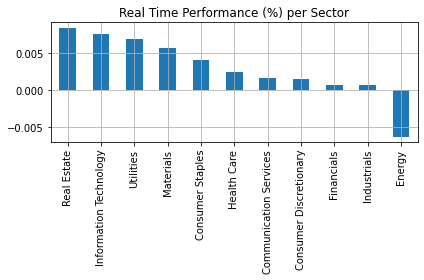

In [29]:
from alpha_vantage.sectorperformance import SectorPerformances

sp = SectorPerformances(key='YOUR_API_KEY', output_format='pandas')
data, meta_data = sp.get_sector()
data['Rank A: Real-Time Performance'].plot(kind='bar')
plt.title('Real Time Performance (%) per Sector')
plt.tight_layout()
plt.grid()
plt.show()

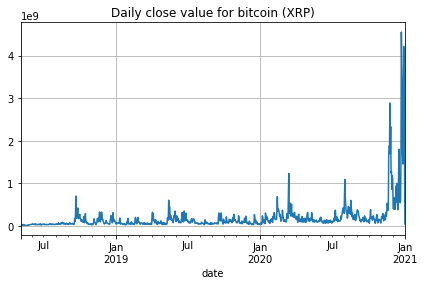

In [16]:
from alpha_vantage.cryptocurrencies import CryptoCurrencies
# import matplotlib.pyplot as plt

cc = CryptoCurrencies(key='ANBKAAOU9YDNYBRV', output_format='pandas')
data, meta_data = cc.get_digital_currency_daily(symbol='XRP', market='CNY')
data['5. volume'].plot()
plt.tight_layout()
plt.title('Daily close value for bitcoin (XRP)')
plt.grid()
plt.show()

In [15]:
data.head()

,1a. open (CNY),1b. open (USD),2a. high (CNY),2b. high (USD),3a. low (CNY),3b. low (USD),4a. close (CNY),4b. close (USD),5. volume,6. market cap (USD)
date,,,,,,,,,,
2021-01-01,1.432916,0.21953,1.451323,0.22235,1.409875,0.21600,1.446558,0.22162,4.186807e+07,4.186807e+07
2020-12-31,1.379393,0.21133,1.497927,0.22949,1.339447,0.20521,1.433308,0.21959,1.391877e+09,1.391877e+09
2020-12-30,1.445253,0.22142,1.544662,0.23665,1.252309,0.19186,1.379720,0.21138,2.578637e+09,2.578637e+09
2020-12-29,1.620834,0.24832,1.642700,0.25167,1.132534,0.17351,1.445253,0.22142,4.215576e+09,4.215576e+09
2020-12-28,1.853790,0.28401,2.023432,0.31000,1.528018,0.23410,1.621683,0.24845,1.547274e+09,1.547274e+09


# Get A DF of tickers
# Thomas to get a better list

In [36]:
########################
# Get Ticker Data 
# Tom: is there another location to pull all Tickers for different Exchanges?
########################

investData = pd.read_csv('https://dumbstockapi.com/stock?format=csv&countries=US')

# investData = pd.read_csv('https://dumbstockapi.com/stock?format=csv&exchanges=NASDAQ')

# http://ftp.nasdaqtrader.com/Trader.aspx?id=symbollookup
# https://www.nasdaq.com/market-activity/stocks/screener

url_nasdaq = "http://ftp.nasdaqtrader.com/dynamic/SymDir/nasdaqtraded.txt"

investData2 = pd.read_csv(url_nasdaq, sep ='|', header= 0 )

In [32]:
print(investData.shape, investData2.shape)

(3538, 4) (9510, 12)


In [28]:
 investData.head(30)

,ticker,name,is_etf,exchange
0,A,"Agilent Technologies, Inc.",NaN,NYSE
1,AA,Alcoa Corporation,NaN,NYSE
2,AAC,"AAC Holdings, Inc.",NaN,NYSE
3,AAN,"Aaron&#39;s, Inc.",NaN,NYSE
4,AAP,Advance Auto Parts Inc,NaN,NYSE
5,AAT,"American Assets Trust, Inc.",NaN,NYSE
6,AB,AllianceBernstein Holding L.P.,NaN,NYSE
7,ABB,ABB Ltd,NaN,NYSE
8,ABBV,AbbVie Inc.,NaN,NYSE
9,ABC,AmerisourceBergen Corporation (Holding Co),NaN,NYSE


In [38]:
investData[investData['ticker'] == 'GOOG'] 

,ticker,name,is_etf,exchange
2805,GOOG,Alphabet Inc.,NaN,NASDAQ


In [ ]:
investData

In [39]:
# pd.DataFrame(investData).shape
## investData.shape
## investDataSubset = investData.ticker.loc[33:100]
# list(investDataSubset)
## investDataSubsetDF = pd.DataFrame(investDataSubset)
# str(investDataSubset.loc[0])
## investDataSubsetDF.columns.str.strip()
# investDataSubsetDF


###################################
# Pull only NYSE
###################################
investData = investData[investData.exchange == 'NYSE']


In [40]:
investData['exchange'].value_counts()

NYSE    3127
Name: exchange, dtype: int64

In [ ]:
investData[investData.exchange == 'NYSE']

,ticker,name,is_etf,exchange
0,A,"Agilent Technologies, Inc.",NaN,NYSE
1,AA,Alcoa Corporation,NaN,NYSE
3,AAC,"AAC Holdings, Inc.",NaN,NYSE
7,AAN,"Aaron&#39;s, Inc.",NaN,NYSE
10,AAP,Advance Auto Parts Inc,NaN,NYSE
...,...,...,...,...
6964,ZTO,ZTO Express (Cayman) Inc.,NaN,NYSE
6965,ZTR,Virtus Global Dividend & Income Fund Inc.,NaN,NYSE
6966,ZTS,Zoetis Inc.,NaN,NYSE
6968,ZUO,"Zuora, Inc.",NaN,NYSE


In [41]:
######################################
# Python program to check if a string contains
# any special characters or not
# import required package
######################################

import re 
  
# Function checks if the input string(test)
# contains any special character or not
def check_splcharacter(test): 
  
    # Make an RE character set and pass  
    # this as an argument in compile function
 
    string_check= re.compile('[@_!#$%^&*()<>?/\|}{~:]') 
      
    # Pass the string in search function  
    # of RE object (string_check).
    # print(test.ticker) 
    # NOTE: the below code relies on extracting text from the ticker attribute
    if(string_check.search(test.ticker) == None): 
        #print(str(test))
        return("noSC")
          
    else:
        #print(str(test)) 
        return("SC") 


In [42]:
investData['SCFlag'] = investData.apply(check_splcharacter, axis = 1)
# investDataSubsetDF.apply(check_splcharacter, axis = 1)
## check_splcharacter(investDataSubset[33])
## investData[investData.SCFlag == 'noSC'].shape
investData = investData[investData.SCFlag == 'noSC']

In [ ]:
# investData['ticker' == 'ASAN']

#Get Data for A single Ticker


In [43]:
######################################
# need to address instances where ticker does not exist 
######################################

# get_data_yahoo() now treats 'null' strings as missing values (GH342)

# start = datetime.datetime(2020, 1, 1)
# end = datetime.datetime(2020, 5, 30)

def get_data(ticker):
    try:
        df = pd.DataFrame()
        # df = pandas_datareader.data.DataReader('%s' % (ticker), 'morningstar', start, end, retry_count=0)
        # df = web.get_quote_av(ticker, api_key = os.getenv('ALPHAVANTAGE_API_KEY'))
        ## df = get_quote_yahoo(ticker)
        df = web.get_data_yahoo(ticker, start="2020-01-01")
        df = df.assign(Stock = ticker)
        # print(df)
    except:
        pass
        
    return df

# get_data('TSLA') #valid Symbol
# get_data('yyfy') #not a valid Symbol
## get_data('A11s1APL') #valid Symbol
# get_data('QQQQ') #not a valid Symbol

In [44]:
get_data(['ASAN', 'TSLA'])
#valid Symbol

Attributes  Adj Close              ...     Volume             
Symbols          ASAN        TSLA  ...       ASAN         TSLA
Date                               ...                        
2020-01-02        NaN   86.052002  ...        NaN   47660500.0
2020-01-03        NaN   88.601997  ...        NaN   88892500.0
2020-01-06        NaN   90.307999  ...        NaN   50665000.0
2020-01-07        NaN   93.811996  ...        NaN   89410500.0
2020-01-08        NaN   98.428001  ...        NaN  155721500.0
...               ...         ...  ...        ...          ...
2020-12-24  30.049999  661.770020  ...   540500.0   22865600.0
2020-12-28  28.809999  663.690002  ...  1254400.0   32278600.0
2020-12-29  28.620001  665.989990  ...  1437400.0   22910800.0
2020-12-30  29.120001  694.780029  ...  1024700.0   42846000.0
2020-12-31  29.549999  705.669983  ...   819800.0   49570900.0

[253 rows x 12 columns]

In [ ]:
# df.index.name = 'newDate'
# outDF3.reset_index(inplace=True)
# outDF3

In [ ]:
## get_quote_yahoo('ZOM')
# investData.ticker[0:10]
investData.reset_index(inplace=True)
investData.ticker[0:10]

0       A
1      AA
2     AAC
3     AAN
4     AAP
5     AAT
6      AB
7     ABB
8    ABBV
9     ABC
Name: ticker, dtype: object

In [ ]:
# investData = investData.head(30)

In [ ]:
# investData



# Get All Data

In [ ]:
#########################
# Get Current Prices
# Note that if a Ticker does not have a price, the FOR LOOP will break due to lack of missing Date/PRICE element
# Caution: this will take some time to run
# There is a current copy in my Google Drive

#########################

outDF = []

for x in investData.ticker:  
    # print(get_quote_yahoo(x).price)
    # print(ticker)
    outDF.append(get_data(x))
    # print(x)
    # print(tmp)
    # dfTickerPrice = get_quote_yahoo(x).price
    # calPerChange = (df.Close - df.Open)/df.Open
    # outDF.append(calPerChange)
# return calPerChange
# outDF

In [45]:
# outDF.remove(outDF[2])
## pd.concat(outDF[1:10])
#for ele in outDF: 
#    if len(ele) == 0: 
#        outDF.remove(ele)
#print(outDF)
## outDF

In [ ]:
#len(outDF)
#filter(None, outDF)
outDF2 = pd.concat(outDF)
# outDF.remove(outDF[19])

In [ ]:
# df['add'] = df.apply(np.sum, axis = 1)
outDF2.head

<bound method NDFrame.head of                  High        Low       Open  ...     Volume  Adj Close  Stock
Date                                         ...                             
2020-01-02  86.349998  85.199997  85.900002  ...  1410500.0  85.398193      A
2020-01-03  85.330002  84.500000  84.669998  ...  1118300.0  84.027046      A
2020-01-06  84.820000  83.599998  84.000000  ...  1993200.0  84.275452      A
2020-01-07  85.260002  83.940002  83.959999  ...  1684700.0  84.533775      A
2020-01-08  86.470001  85.199997  85.959999  ...  1847600.0  85.368385      A
...               ...        ...        ...  ...        ...        ...    ...
2020-12-14  53.430000  51.040001  51.849998  ...   377100.0  51.520000   ZYME
2020-12-15  52.200001  51.000000  52.040001  ...   203800.0  51.509998   ZYME
2020-12-16  51.790001  50.119999  51.700001  ...   266900.0  51.330002   ZYME
2020-12-17  52.060001  50.310001  51.340000  ...   309900.0  51.700001   ZYME
2020-12-18  52.750000  51.200001  

In [ ]:
outDF2.index.name = 'newDate'
outDF2.reset_index(inplace=True)
outDF2.shape

(586569, 8)

In [ ]:
outDF2

,newDate,High,Low,Open,Close,Volume,Adj Close,Stock
0,2020-01-02,86.349998,85.199997,85.900002,85.949997,1410500.0,85.398193,A
1,2020-01-03,85.330002,84.500000,84.669998,84.570000,1118300.0,84.027046,A
2,2020-01-06,84.820000,83.599998,84.000000,84.820000,1993200.0,84.275452,A
3,2020-01-07,85.260002,83.940002,83.959999,85.080002,1684700.0,84.533775,A
4,2020-01-08,86.470001,85.199997,85.959999,85.919998,1847600.0,85.368385,A
...,...,...,...,...,...,...,...,...
586564,2020-12-14,53.430000,51.040001,51.849998,51.520000,377100.0,51.520000,ZYME
586565,2020-12-15,52.200001,51.000000,52.040001,51.509998,203800.0,51.509998,ZYME
586566,2020-12-16,51.790001,50.119999,51.700001,51.330002,266900.0,51.330002,ZYME
586567,2020-12-17,52.060001,50.310001,51.340000,51.700001,309900.0,51.700001,ZYME


In [ ]:
# outDF2[outDF2.ticker == 'TSLA']

# plt.hist(float(outDF2[outDF2.price < 5]))
###################################
# This used to work
###################################
# fig = px.box(outDF2."price", y="Adj Close", points = "all")
# fig.show()

# Export Data


In [46]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
outDF2.to_csv('outDF2_20201218.csv')
!cp outDF2_20201218.csv "drive/My Drive/"
  # drive.flush_and_unmount()

  # After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
##!ls "/content/drive/My Drive"

In [47]:
drive.flush_and_unmount()

In [ ]:
##############################################
# connect with StockTwits #
# Tom: WE NEED THIS!
# Tom: Parse out StockTwits data
##############################################

# https://api.stocktwits.com/api/2/streams/symbol/A.json

# import json

# with open('https://api.stocktwits.com/api/2/streams/symbol/A.json') as f:
#   data = json.load(f)

# person_dict = {'name': 'Bob',
# 'age': 12,
# 'children': None
# }
# person_json = json.dumps(person_dict)

# Output: {"name": "Bob", "age": 12, "children": null}
# print(person_json)

import urllib, json, urllib.request

# url = "https://api.stocktwits.com/api/2/streams/symbol/A.json"

# response = urllib.request.urlopen(url)
# data = json.loads(response.read())
# print(data)

# Start here if you'd like


In [48]:
##############################################
# read in historical data previously created #
##############################################
drive.mount('/content/drive')
outDF2 = pd.read_csv("drive/My Drive/outDF2_20201218.csv", index_col=0)
# df=pd.read_csv('gdrive/My Drive/data.csv')
# Preview the first 5 lines of the loaded data 
# drive.flush_and_unmount()
drive.flush_and_unmount()

Mounted at /content/drive


In [49]:
outDF2.shape

(586569, 8)

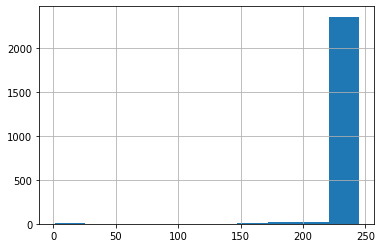

In [50]:
(outDF2['Stock'].value_counts()).hist()

In [56]:
# Below code is framework to pull historical data
outDF2.iloc[: ,0:3]
outDF2[outDF2['Stock'] == 'A']
# outDF2.head()

,newDate,High,Low,Open,Close,Volume,Adj Close,Stock
0,2020-01-02,86.349998,85.199997,85.900002,85.949997,1410500.0,85.398193,A
1,2020-01-03,85.330002,84.500000,84.669998,84.570000,1118300.0,84.027046,A
2,2020-01-06,84.820000,83.599998,84.000000,84.820000,1993200.0,84.275452,A
3,2020-01-07,85.260002,83.940002,83.959999,85.080002,1684700.0,84.533775,A
4,2020-01-08,86.470001,85.199997,85.959999,85.919998,1847600.0,85.368385,A
...,...,...,...,...,...,...,...,...
240,2020-12-14,120.239998,116.739998,118.610001,116.739998,1395200.0,116.739998,A
241,2020-12-15,118.040001,116.849998,117.300003,117.389999,1973800.0,117.389999,A
242,2020-12-16,117.739998,116.400002,117.580002,117.239998,1698600.0,117.239998,A
243,2020-12-17,119.389999,117.040001,118.050003,118.970001,2166700.0,118.970001,A


In [61]:
#################################################
# only run this when needed to rename index
#################################################

# outDF2.index.name = 'ticker'
# outDF2.reset_index(inplace=True)
(outDF2['Stock'].unique()).shape

(2422,)

In [ ]:
# outDF2.set_index("ticker", inplace=True)  

# Ticker Information



In [63]:
# https://www.stockmonitor.com/sector/basic-materials/
# https://www.stockmonitor.com/sector/communication-services/
# https://www.stockmonitor.com/sector/consumer-cyclical/
# https://www.stockmonitor.com/sector/energy/
# https://www.stockmonitor.com/sector/financial-services/
# https://www.stockmonitor.com/sector/healthcare/
# https://www.stockmonitor.com/sector/industrials/
# https://www.stockmonitor.com/sector/technology/
# https://www.stockmonitor.com/sector/utilities/

# d = {'col1': [1, 2], 'col2': [3, 4]}

tickerSites = {'sites' : ['https://www.stockmonitor.com/sector/basic-materials/'
,'https://www.stockmonitor.com/sector/communication-services/'
,'https://www.stockmonitor.com/sector/consumer-cyclical/'
,'https://www.stockmonitor.com/sector/energy/'
,'https://www.stockmonitor.com/sector/financial-services/'
,'https://www.stockmonitor.com/sector/healthcare/'
,'https://www.stockmonitor.com/sector/industrials/'
,'https://www.stockmonitor.com/sector/technology/'
,'https://www.stockmonitor.com/sector/utilities/'], 'type' : ['basic-materials'
,'communication-services'
,'consumer-cyclical'
,'energy'
,'financial-services'
,'healthcare'
,'industrials'
,'technology'
,'utilities']
}

In [64]:
tickerSites_df = pd.DataFrame(tickerSites)

In [65]:
#########################
# Extract Multiple Series
#########################

df_out = pd.DataFrame()

for i in range(0, tickerSites_df.shape[0]): 
  # print(i)
  dfs = pd.read_html(tickerSites_df['sites'][i], header=0)
  for df in dfs:

    # print(df) 
    df['type'] = tickerSites_df['type'][i]

    # calPerChange = (df.Close - df.Open)/df.Open
    df_out = df_out.append(df)
    
    # df.append(df)
    # pd.concat(df)
    # return siteDF
df_out

# siteDF

,Change%,Company,Company.1,Price,Volume,Low,High,type
0,▲ 0.50%,ASIX,AdvanSix Inc,19.99,200873,19.775,20.73,basic-materials
1,▼ -2.25%,AEM,Agnico Eagle Mines Limited,70.51,840500,70.270,72.67,basic-materials
2,▲ 0.78%,APD,"Air Products and Chemicals, Inc",273.22,793400,268.300,273.58,basic-materials
3,▼ -2.67%,AGI,Alamos Gold Inc,8.75,1961700,8.640,9.01,basic-materials
4,▼ -1.19%,ALB,Albemarle Corporation,147.52,779200,146.810,149.37,basic-materials
...,...,...,...,...,...,...,...,...
95,▲ 1.51%,UGI,UGI Corporation,34.96,1065900,34.480,35.20,utilities
96,▲ 2.08%,UTL,Unitil Corporation,44.27,98400,43.250,44.40,utilities
97,▲ 0.87%,VST,Vistra Energy Corp,19.66,2561226,19.400,19.75,utilities
98,▲ 1.63%,WEC,"WEC Energy Group, Inc",92.03,1083225,90.190,92.08,utilities


In [66]:
#########################################
# Ticker Data and Time Series Data
#########################################

print(df_out.shape, outDF2.shape)

(4785, 8) (586569, 8)


In [70]:
# Renamed ticker "Company" to "Stock" for Merging

df_out = df_out.rename(columns={"Company": "Stock"})


In [71]:
df_out.head()

,Change%,Stock,Company.1,Price,Volume,Low,High,type
0,▲ 0.50%,ASIX,AdvanSix Inc,19.99,200873,19.775,20.73,basic-materials
1,▼ -2.25%,AEM,Agnico Eagle Mines Limited,70.51,840500,70.270,72.67,basic-materials
2,▲ 0.78%,APD,"Air Products and Chemicals, Inc",273.22,793400,268.300,273.58,basic-materials
3,▼ -2.67%,AGI,Alamos Gold Inc,8.75,1961700,8.640,9.01,basic-materials
4,▼ -1.19%,ALB,Albemarle Corporation,147.52,779200,146.810,149.37,basic-materials


In [72]:
outDF2.head()

,newDate,High,Low,Open,Close,Volume,Adj Close,Stock
0,2020-01-02,86.349998,85.199997,85.900002,85.949997,1410500.0,85.398193,A
1,2020-01-03,85.330002,84.500000,84.669998,84.570000,1118300.0,84.027046,A
2,2020-01-06,84.820000,83.599998,84.000000,84.820000,1993200.0,84.275452,A
3,2020-01-07,85.260002,83.940002,83.959999,85.080002,1684700.0,84.533775,A
4,2020-01-08,86.470001,85.199997,85.959999,85.919998,1847600.0,85.368385,A


In [78]:
df_out[df_out['Stock'] == 'A']

,Change%,Stock,Company.1,Price,Volume,Low,High,type
51,▲ 0.94%,A,"Agilent Technologies, Inc",118.49,1307200,116.6,118.6,healthcare


In [77]:
outDF2[outDF2['Stock'] == 'A']

,newDate,High,Low,Open,Close,Volume,Adj Close,Stock
0,2020-01-02,86.349998,85.199997,85.900002,85.949997,1410500.0,85.398193,A
1,2020-01-03,85.330002,84.500000,84.669998,84.570000,1118300.0,84.027046,A
2,2020-01-06,84.820000,83.599998,84.000000,84.820000,1993200.0,84.275452,A
3,2020-01-07,85.260002,83.940002,83.959999,85.080002,1684700.0,84.533775,A
4,2020-01-08,86.470001,85.199997,85.959999,85.919998,1847600.0,85.368385,A
...,...,...,...,...,...,...,...,...
240,2020-12-14,120.239998,116.739998,118.610001,116.739998,1395200.0,116.739998,A
241,2020-12-15,118.040001,116.849998,117.300003,117.389999,1973800.0,117.389999,A
242,2020-12-16,117.739998,116.400002,117.580002,117.239998,1698600.0,117.239998,A
243,2020-12-17,119.389999,117.040001,118.050003,118.970001,2166700.0,118.970001,A


In [79]:
outDF2['Stock'].value_counts()

EVH      245
MIN      245
USAC     245
TVE      245
HBB      245
        ... 
EAI        1
SFB        1
CTEST      1
RCA        1
EMP        1
Name: Stock, Length: 2422, dtype: int64

In [80]:
outDF2.dtypes

newDate       object
High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Adj Close    float64
Stock         object
dtype: object

In [81]:
df_out.dtypes

Change%       object
Stock         object
Company.1     object
Price        float64
Volume         int64
Low          float64
High         float64
type          object
dtype: object

In [87]:
df_out2 = outDF2.merge(df_out.loc[:,['Stock', 'type']], how = 'left', on = 'Stock', indicator=True)
# list(dfMerge.columns)
# df_out2.tail()

In [88]:
# ASAN not showing up due to dumbStock API
# TSLA is in NASDAQ
df_out2[df_out2['Stock'] == 'A']

,newDate,High,Low,Open,Close,Volume,Adj Close,Stock,type,_merge
0,2020-01-02,86.349998,85.199997,85.900002,85.949997,1410500.0,85.398193,A,healthcare,both
1,2020-01-03,85.330002,84.500000,84.669998,84.570000,1118300.0,84.027046,A,healthcare,both
2,2020-01-06,84.820000,83.599998,84.000000,84.820000,1993200.0,84.275452,A,healthcare,both
3,2020-01-07,85.260002,83.940002,83.959999,85.080002,1684700.0,84.533775,A,healthcare,both
4,2020-01-08,86.470001,85.199997,85.959999,85.919998,1847600.0,85.368385,A,healthcare,both
...,...,...,...,...,...,...,...,...,...,...
240,2020-12-14,120.239998,116.739998,118.610001,116.739998,1395200.0,116.739998,A,healthcare,both
241,2020-12-15,118.040001,116.849998,117.300003,117.389999,1973800.0,117.389999,A,healthcare,both
242,2020-12-16,117.739998,116.400002,117.580002,117.239998,1698600.0,117.239998,A,healthcare,both
243,2020-12-17,119.389999,117.040001,118.050003,118.970001,2166700.0,118.970001,A,healthcare,both


In [ ]:
##############################################
# This data is starting to look Good!
##############################################

outDF2.shape

(586569, 8)

In [2]:
# df_out2[df_out2['Stock'] == 'WORK'].tail()

In [ ]:
df_out2['type'].value_counts()

financial-services        85250
industrials               70753
consumer-cyclical         56827
energy                    50498
basic-materials           34790
technology                34063
healthcare                27685
communication-services    20089
utilities                 18554
Name: type, dtype: int64

In [89]:
df_out2_ex = df_out2[df_out2['Stock'] == 'WORK']

In [90]:
df_out2_ex.dtypes

newDate        object
High          float64
Low           float64
Open          float64
Close         float64
Volume        float64
Adj Close     float64
Stock          object
type           object
_merge       category
dtype: object

In [91]:
df_out2_ex

,newDate,High,Low,Open,Close,Volume,Adj Close,Stock,type,_merge
573406,2020-01-02,23.160000,22.139999,22.320000,23.020000,11672300.0,23.020000,WORK,technology,both
573407,2020-01-03,22.920000,22.379999,22.500000,22.459999,6765400.0,22.459999,WORK,technology,both
573408,2020-01-06,23.660000,22.160000,22.320000,23.520000,12528700.0,23.520000,WORK,technology,both
573409,2020-01-07,23.950001,23.219999,23.530001,23.830000,9948100.0,23.830000,WORK,technology,both
573410,2020-01-08,24.260000,23.250000,23.610001,23.770000,7522700.0,23.770000,WORK,technology,both
...,...,...,...,...,...,...,...,...,...,...
573646,2020-12-14,42.439999,42.165001,42.330002,42.259998,12767200.0,42.259998,WORK,technology,both
573647,2020-12-15,42.310001,41.959999,42.299999,42.080002,19388900.0,42.080002,WORK,technology,both
573648,2020-12-16,42.680000,42.080002,42.099998,42.610001,15261900.0,42.610001,WORK,technology,both
573649,2020-12-17,42.910000,42.430000,42.650002,42.540001,16639700.0,42.540001,WORK,technology,both


# Let's see what Alpha_Vantage/StockTwits Data we can add

In [105]:
##############################################
# connect with StockTwits #
# Tom: WE NEED THIS!
# Tom: Parse out StockTwits data
##############################################

# https://api.stocktwits.com/api/2/streams/symbol/A.json

# import json

# with open('https://api.stocktwits.com/api/2/streams/symbol/A.json') as f:
#   data = json.load(f)

# person_dict = {'name': 'Bob',
# 'age': 12,
# 'children': None
# }
# person_json = json.dumps(person_dict)

# Output: {"name": "Bob", "age": 12, "children": null}
# print(person_json)

import urllib, json, urllib.request

# url = "https://api.stocktwits.com/api/2/streams/symbol/A.json"

# response = urllib.request.urlopen(url)
# data = json.loads(response.read())
# print(data)

# pd.read_json(url)

HTTPError: ignored

In [99]:
data

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2020-12-31,699.99,718.72,691.1200,705.67,49649928.0
2020-12-30,672.00,696.60,668.3603,694.78,42846021.0
2020-12-29,661.00,669.90,655.0000,665.99,22910811.0
2020-12-28,674.51,681.40,660.8000,663.69,31553561.0
2020-12-24,642.99,666.09,641.0000,661.77,22865568.0
...,...,...,...,...,...
2020-08-17,1677.00,1845.86,1672.8300,1835.64,20023104.0
2020-08-14,1664.99,1668.80,1626.6400,1650.71,12577614.0
2020-08-13,1611.00,1651.18,1567.2600,1621.00,20425308.0


# Time Series Chart


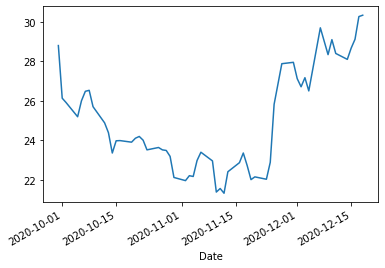

In [ ]:
outDF3['Close'].plot()

# Dictionary to enhance Daily Obs


In [101]:
pd.read_json('https://query1.finance.yahoo.com/v7/finance/quote?formatted=false&symbols=IBM')

,quoteResponse
error,None
result,"[{'language': 'en-US', 'region': 'US', 'quoteT..."


In [ ]:
## outDF2.loc[['AABA', 'ZYNE']]
pd.DataFrame(outDF2.columns)
# extract only Float64 items 
pd.DataFrame(outDF2.dtypes)=='float64'

outDF3 = outDF2[(outDF2.dtypes=='float64').index[outDF2.dtypes=='float64']]

In [ ]:
### Write out column names ###
### DO NOT RUN UNLESS YOU NEED TO CREATE COLUMNS ###
outDF2_Columns = pd.DataFrame(outDF2.columns)

drive.mount('/content/drive')
outDF2_Columns.to_csv('outDF2_Columns.csv')
!cp outDF2_Columns.csv "drive/My Drive/"
drive.flush_and_unmount()

In [ ]:
# outDF2.dtypes
############################]
# I do not know where this data came from
# I think it comes from Yahoo or AdvantageKey
# I think it is real time 
############################

# outDF2 is all data
# outDF3 is continuous Data for Correlation analysis
outDF3.head()

#########
# 1-1-20
#########

### https://query1.finance.yahoo.com/v7/finance/quote?formatted=false&symbols=IBM



,postMarketChangePercent,postMarketTime,postMarketPrice,postMarketChange,regularMarketChange,regularMarketChangePercent,regularMarketPrice,regularMarketDayHigh,regularMarketDayLow,regularMarketPreviousClose,bid,ask,regularMarketOpen,fiftyTwoWeekLowChange,fiftyTwoWeekLowChangePercent,fiftyTwoWeekHighChange,fiftyTwoWeekHighChangePercent,fiftyTwoWeekLow,fiftyTwoWeekHigh,dividendDate,earningsTimestamp,earningsTimestampStart,earningsTimestampEnd,trailingAnnualDividendRate,trailingPE,trailingAnnualDividendYield,epsTrailingTwelveMonths,epsForward,bookValue,fiftyDayAverage,fiftyDayAverageChange,fiftyDayAverageChangePercent,twoHundredDayAverage,twoHundredDayAverageChange,twoHundredDayAverageChangePercent,forwardPE,priceToBook,price
0,0.502517,1.589585e+09,82.00,0.410004,-0.050003,-0.061248,81.59,82.830,81.22,81.64,80.00,81.98,81.51,20.459995,0.334696,-9.050003,-0.099846,61.13,90.64,1.587514e+09,1.590106e+09,1.590106e+09,1.590106e+09,0.672,33.756720,0.008231,2.417,3.57,15.636,76.460590,5.129410,0.067086,79.576200,2.013794,0.025306,22.854342,5.218086,81.59
1,0.150154,1.589587e+09,6.67,0.010000,-0.150000,-2.202645,6.66,6.930,6.62,6.81,6.63,6.67,6.70,1.500000,0.290698,-18.220000,-0.732315,5.16,24.88,1.480032e+09,1.587586e+09,1.594825e+09,1.595261e+09,0.360,NaN,0.052863,-4.567,-0.24,22.994,7.256765,-0.596765,-0.082236,14.536058,-7.876059,-0.541829,-27.750000,0.289641,6.66
2,0.000000,1.589574e+09,31.30,0.000000,-0.780003,-2.431429,31.30,31.790,30.73,32.08,27.77,36.80,31.65,18.289999,1.405842,-47.350002,-0.602034,13.01,78.65,1.586218e+09,1.588849e+09,1.595522e+09,1.595867e+09,0.150,NaN,0.004676,-4.536,3.77,21.564,26.705587,4.594412,0.172039,45.787300,-14.487301,-0.316404,8.302387,1.451493,31.30
3,0.000000,1.589576e+09,126.06,0.000000,4.930000,4.070008,126.06,127.025,118.73,121.13,125.47,130.00,119.91,54.729996,0.767279,-45.369995,-0.264656,71.33,171.43,1.585872e+09,1.589906e+09,1.589906e+09,1.589906e+09,0.240,18.429823,0.001981,6.840,8.54,51.606,112.631770,13.428230,0.119222,135.227300,-9.167297,-0.067792,14.761124,2.442739,126.06
4,0.000000,1.589574e+09,24.38,0.000000,-0.200001,-0.813673,24.38,24.640,23.61,24.58,15.25,24.93,24.41,4.229999,0.209926,-24.880000,-0.505075,20.15,49.26,1.593043e+09,1.588105e+09,1.595948e+09,1.596470e+09,1.160,30.173265,0.047193,0.808,1.35,21.713,26.122942,-1.742943,-0.066721,39.025257,-14.645258,-0.375276,18.059258,1.122830,24.38


In [ ]:
outDF2.shape

(29, 73)

# Quick Analysis

In [ ]:
outDF3.corr()

,postMarketChangePercent,postMarketTime,postMarketPrice,postMarketChange,regularMarketChange,regularMarketChangePercent,regularMarketPrice,regularMarketDayHigh,regularMarketDayLow,regularMarketPreviousClose,bid,ask,regularMarketOpen,fiftyTwoWeekLowChange,fiftyTwoWeekLowChangePercent,fiftyTwoWeekHighChange,fiftyTwoWeekHighChangePercent,fiftyTwoWeekLow,fiftyTwoWeekHigh,dividendDate,earningsTimestamp,earningsTimestampStart,earningsTimestampEnd,trailingAnnualDividendRate,trailingPE,trailingAnnualDividendYield,epsTrailingTwelveMonths,epsForward,bookValue,fiftyDayAverage,fiftyDayAverageChange,fiftyDayAverageChangePercent,twoHundredDayAverage,twoHundredDayAverageChange,twoHundredDayAverageChangePercent,forwardPE,priceToBook,price
postMarketChangePercent,1.000000,-0.261967,-0.005281,0.587613,-0.497154,-0.862467,-0.009395,-0.009342,0.004935,0.009273,-0.004037,-0.003836,0.003247,-0.027569,-0.202332,0.493384,0.318405,-0.001001,-0.265760,0.457688,-0.017026,-0.180615,-0.172006,-0.368835,-0.541261,0.031740,-0.106767,-0.155991,0.081018,-0.005523,-0.044769,-0.422736,-0.035658,0.119718,0.151205,-0.296457,-0.106999,-0.009395
postMarketTime,-0.261967,1.000000,0.346257,-0.148163,0.152348,0.340957,0.346074,0.350166,0.350886,0.346547,0.359834,0.338675,0.349921,0.258679,-0.202992,-0.227077,0.079675,0.365638,0.397914,0.037393,0.215245,-0.267240,-0.278213,0.302062,0.420309,-0.276589,0.126365,0.312258,-0.132560,0.342838,0.247596,0.149348,0.317130,0.121681,0.154425,-0.214356,-0.032313,0.346074
postMarketPrice,-0.005281,0.346257,1.000000,-0.502746,0.489752,-0.098034,0.999982,0.999964,0.999633,0.999469,0.998522,0.999476,0.999647,0.913997,-0.195204,-0.088508,0.664516,0.984166,0.852735,0.011642,0.541713,-0.514043,-0.540780,0.359027,0.126128,-0.473883,0.688012,0.645508,0.334184,0.997020,0.651199,0.177653,0.975401,0.083011,0.680011,0.334328,0.140418,0.999982
postMarketChange,0.587613,-0.148163,-0.502746,1.000000,-0.371734,-0.199054,-0.507990,-0.504982,-0.502142,-0.503071,-0.497627,-0.506187,-0.503033,-0.425570,0.058415,0.234343,-0.127874,-0.516784,-0.532291,0.334816,-0.251756,-0.080474,-0.064528,-0.382995,-0.230474,0.142286,-0.392711,-0.245077,-0.195279,-0.521088,-0.183989,-0.119935,-0.534776,0.136453,-0.159591,-0.269923,-0.176664,-0.507990
regularMarketChange,-0.497154,0.152348,0.489752,-0.371734,1.000000,0.584590,0.496824,0.495071,0.475438,0.468366,0.499716,0.498872,0.474652,0.513283,0.058778,-0.298931,0.062657,0.463947,0.549800,-0.051246,0.429589,-0.275784,-0.290575,0.029099,0.170187,-0.273962,0.424844,0.349401,0.256008,0.472691,0.556358,0.419426,0.488236,0.008202,0.188685,0.107549,0.149991,0.496824
regularMarketChangePercent,-0.862467,0.340957,-0.098034,-0.199054,0.584590,1.000000,-0.081439,-0.080193,-0.097602,-0.104795,-0.078195,-0.084909,-0.096717,-0.046389,0.253166,-0.473547,-0.371841,-0.092457,0.179620,-0.052346,0.035075,-0.249227,-0.250132,-0.066246,0.554881,-0.353978,-0.026801,0.083519,-0.201407,-0.096154,0.099769,0.519927,-0.076641,-0.016929,-0.165962,0.169988,0.099408,-0.081439
regularMarketPrice,-0.009395,0.346074,0.999982,-0.507990,0.496824,-0.081439,1.000000,0.999941,0.999620,0.999472,0.998516,0.999495,0.999643,0.916101,-0.151229,-0.121505,0.635463,0.984695,0.858758,0.111974,0.546178,-0.214958,-0.235797,0.362510,0.145948,-0.455930,0.679020,0.659405,0.324621,0.997243,0.651223,0.192491,0.976113,0.046858,0.640330,0.226923,0.148518,1.000000
regularMarketDayHigh,-0.009342,0.350166,0.999964,-0.504982,0.495071,-0.080193,0.999941,1.000000,0.999583,0.999477,0.998543,0.999397,0.999641,0.917408,-0.149446,-0.124884,0.634271,0.984045,0.860454,0.114443,0.546692,-0.218555,-0.239434,0.361346,0.148851,-0.457593,0.676787,0.660956,0.326335,0.997073,0.652318,0.194677,0.976174,0.046307,0.641387,0.227960,0.149009,0.999941
regularMarketDayLow,0.004935,0.350886,0.999633,-0.502142,0.475438,-0.097602,0.999620,0.999583,1.000000,0.999886,0.998185,0.998938,0.999967,0.910975,-0.158692,-0.109569,0.645950,0.986398,0.852293,0.114475,0.546037,-0.211408,-0.232305,0.370489,0.1428

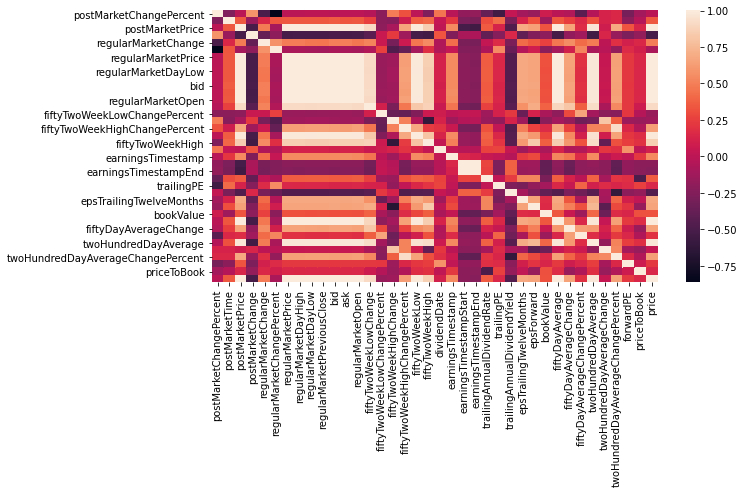

In [ ]:
#############################################
## Add some TensorFlow or Pytorch Analysis ##
## you can ignore the stuff below here
#############################################

plt.figure(figsize=(10,5))
sns.heatmap(outDF3.corr())

# sns.pairplot(outDF3)

In [100]:
web.get_quote_av(["AAPL"], api_key = os.getenv('ALPHAVANTAGE_API_KEY'))

ImmediateDeprecationError: ignored

In [5]:
## 02/05/2020

#ALPHAVANTAGE_API_KEY = 'ANBKAAOU9YDNYBRV'
#keyValue = os.getenv(ALPHAVANTAGE_API_KEY)
## os.environ['ALPHAVANTAGE_API_KEY'] = 'ANBKAAOU9YDNYBRV'
### get_quote_yahoo('AGRX').price
### get_quote_yahoo('WORK').price
#pd.concat('WORK', web.DataReader('WORK', 'yahoo', '2019-10-01'))
outDF3 = web.DataReader('ASAN', 'yahoo', '2019-06-01')
outDF3 = outDF3.assign(Stock = 'ASAN')
outDF3
# len(get_quote_yahoo(investData.ticker[3]))
## web.get_quote_av(["AAPL"], api_key = os.getenv('ALPHAVANTAGE_API_KEY'))
## web.get_quote_av(["AAPL", "TSLA"])
# os.getcwd()
## os.getenv('ALPHAVANTAGE_API_KEY')
## web.get_sector_performance_av()
# alphaVantage API Key: ANBKAAOU9YDNYBRV
## investDataSubsetDF_clean =  investDataSubsetDF[investDataSubsetDF['SCFlag'] == 'noSC']
## web.DataReader('gs', 'iex-tops')
## web.get_quote_av(["AAPL", "TSLA"])

ImmediateDeprecationError: ignored

In [4]:
# web.get_quote_av(["AAPL", "TSLA"])

In [ ]:
outDF3.index.name = 'newDate'
outDF3.reset_index(inplace=True)
outDF3

,newDate,High,Low,Open,Close,Volume,Adj Close,Stock
0,2019-06-03,186.679993,176.990005,185.509995,178.970001,13064400,178.970001,TSLA
1,2019-06-04,193.979996,179.610001,181.100006,193.600006,13807500,193.600006,TSLA
2,2019-06-05,201.279999,191.850006,198.679993,196.589996,13510800,196.589996,TSLA
3,2019-06-06,211.000000,201.800003,204.440002,205.949997,20242200,205.949997,TSLA
4,2019-06-07,210.839996,203.500000,205.000000,204.500000,16003500,204.500000,TSLA
...,...,...,...,...,...,...,...,...
174,2020-02-10,819.989990,752.400024,800.000000,771.280029,24689200,771.280029,TSLA
175,2020-02-11,783.510010,758.000000,768.789978,774.380005,11697500,774.380005,TSLA
176,2020-02-12,789.750000,763.369995,777.869995,767.289978,12022500,767.289978,TSLA
177,2020-02-13,818.000000,735.000000,741.840027,804.000000,26289300,804.000000,TSLA


In [ ]:
# fig = px.line(outDF2[outDF2.Stock == 'ASAN'], x='newDate', y='High')
# fig.show()

In [ ]:
investDataSubsetDF_clean['ticker'].iloc[13]

In [ ]:
###################################
# Need code to extract tickers with recent data
# and extract tickers with SPECIAL CHARACTERS
# Data as of Today() - 1
###################################

# dataMostRecent = []
dataMostRecent = web.get_quote_av(list(investDataSubsetDF_clean['ticker'][14:20]), api_key = os.getenv('ALPHAVANTAGE_API_KEY'))
dataMostRecent

In [ ]:
# df['add'] = df.apply(np.sum, axis = 1)

In [ ]:
outDF

,language,region,quoteType,triggerable,quoteSourceName,currency,firstTradeDateMilliseconds,priceHint,postMarketChangePercent,postMarketTime,postMarketPrice,postMarketChange,regularMarketChange,regularMarketChangePercent,regularMarketTime,regularMarketPrice,regularMarketDayHigh,regularMarketDayRange,regularMarketDayLow,regularMarketVolume,regularMarketPreviousClose,bid,ask,bidSize,askSize,fullExchangeName,financialCurrency,regularMarketOpen,averageDailyVolume3Month,averageDailyVolume10Day,fiftyTwoWeekLowChange,fiftyTwoWeekLowChangePercent,fiftyTwoWeekRange,fiftyTwoWeekHighChange,fiftyTwoWeekHighChangePercent,fiftyTwoWeekLow,fiftyTwoWeekHigh,dividendDate,earningsTimestamp,earningsTimestampStart,earningsTimestampEnd,trailingAnnualDividendRate,trailingPE,trailingAnnualDividendYield,marketState,epsTrailingTwelveMonths,epsForward,sharesOutstanding,bookValue,fiftyDayAverage,fiftyDayAverageChange,fiftyDayAverageChangePercent,twoHundredDayAverage,twoHundredDayAverageChange,twoHundredDayAverageChangePercent,marketCap,forwardPE,priceToBook,sourceInterval,exchangeDataDelayedBy,tradeable,exchange,shortName,longName,messageBoardId,exchangeTimezoneName,exchangeTimezoneShortName,gmtOffSetMilliseconds,market,esgPopulated,price
A,en-US,US,EQUITY,True,Delayed Quote,USD,942915600000,2,0.0,1579298684,90.12,0.0,0.660004,0.737764,1579295048,90.12,90.28,89.205 - 90.28,89.205,3718336,89.46,88.87,89.98,12,14,NYSE,USD,89.97,1613106,1944500,24.770004,0.379036,65.35 - 90.28,-0.159996,-0.001772,65.35,90.28,1579651200,1582059600,1582059600,1582059600,0.656,26.741842,0.007333,CLOSED,3.37,3.8,309000000,15.362,84.83727,5.28273,0.062269,76.43817,13.681831,0.178992,27953692672,23.71579,5.866424,15,0,True,NYQ,"Agilent Technologies, Inc.","Agilent Technologies, Inc.",finmb_154924,America/New_York,EST,-18000000,us_market,False,90.12


In [ ]:
#########################
# Extract Single Ticker
#########################

investData.loc[investData.ticker == 'IBIO']
myTicker = investData.loc[investData.ticker == 'IBIO'].ticker
myTicker

3164    IBIO
Name: ticker, dtype: object

In [ ]:
#########################
# Create Array with Tickers
# Run from here
#########################

myTickers = ['ASAN', 'SPCE', 'WORK', 'CETX', 'TSLA']
myTickers

myTicker = ['AGRX']

In [ ]:
#########################
# Extract Single Series
#########################

start = datetime.datetime(2019, 1, 1)
end = datetime.datetime(2019, 1, 11)

#########################
# here arbirtraty ticker input
# note that excluding "end" will extract current data
#########################

df = web.DataReader(myTicker, 'yahoo', start)
# df.describe()

In [ ]:
#########################
# Extract Multiple Series
#########################

outDF = []

for i in myTickers:  
    df = web.DataReader(myTickers, 'yahoo', start)
    calPerChange = (df.Close - df.Open)/df.Open
    # outDF.append(calPerChange)
# return calPerChange
# outDF

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd9bb94cb00>,
      dtype=object)

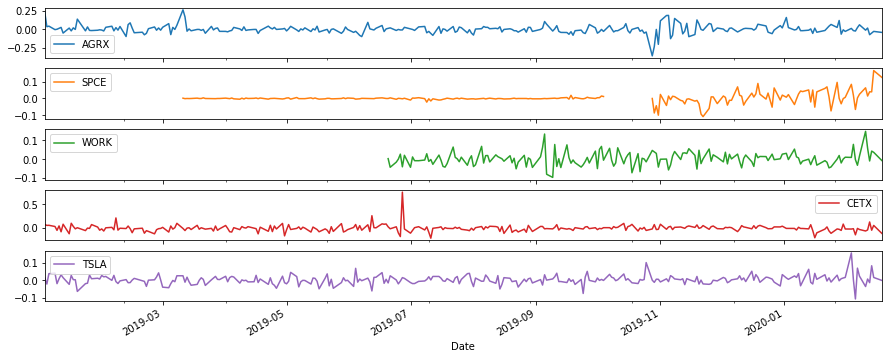

In [ ]:
# calPerChange = []
calPerChange.head()
calPerChange.plot(subplots=True, figsize=(15,6))

In [ ]:
corr = calPerChange.corr()
corr

Symbols,AGRX,SPCE,WORK,CETX,TSLA
Symbols,,,,,
AGRX,1.000000,0.070598,0.023858,0.059532,0.036939
SPCE,0.070598,1.000000,0.063959,0.020090,0.231177
WORK,0.023858,0.063959,1.000000,-0.053147,0.012853
CETX,0.059532,0.020090,-0.053147,1.000000,0.086999
TSLA,0.036939,0.231177,0.012853,0.086999,1.000000


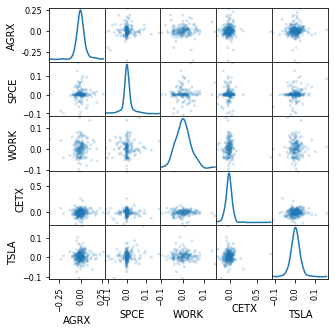

In [ ]:
scatter_matrix(calPerChange, diagonal='kde', alpha=0.2, figsize=(5, 5));

Text(0, 0.5, 'Returns SRRA')

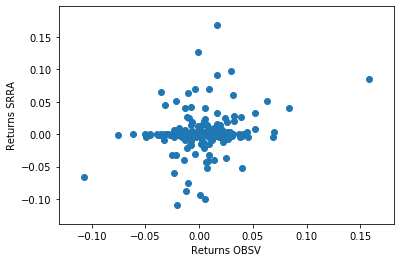

In [ ]:
plt.scatter(calPerChange.TSLA, calPerChange.SPCE)
plt.xlabel('Returns OBSV')
plt.ylabel('Returns SRRA')

Text(0, 0.5, 'Returns IBIO')

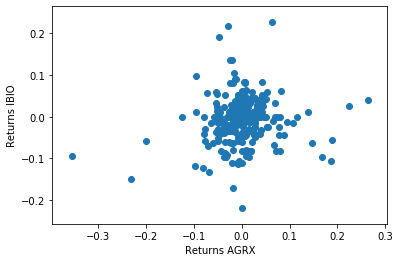

In [ ]:
#########################
# One outlier, remove
#########################

calPerChange2 = calPerChange[calPerChange.IBIO < 1]

plt.scatter(calPerChange2.AGRX, calPerChange2.IBIO)
plt.xlabel('Returns AGRX')
plt.ylabel('Returns IBIO')

In [ ]:
#########################
# some calculated values 
#########################

# calPerChange = (outDF.Close - outDF.Open)/outDF.Open
# calPerChange
# calPerChange = calPerChange.rename(columns={"IBIO": "PerChange"})
# list(outDF.columns) 

In [ ]:
# calPerChange.pivot_table(index='Date',columns='Stock',values='PerChange',aggfunc='sum').plot()

In [ ]:
#########################
# some calculated values 
#########################

close_px = df['Adj Close']
mavg = close_px.rolling(window=100).mean()
mavg.head()

Symbols,IBIO
Date,
2018-01-02,NaN
2018-01-03,NaN
2018-01-04,NaN
2018-01-05,NaN
2018-01-08,NaN


In [ ]:
#########################
# join DF's 
#########################
# Tom: what is this doing?

dfMerge = df.merge(calPerChange, left_on = 'Date', right_on = 'Date')
# list(dfMerge.columns)
dfMerge.tail()

,"(Adj Close, IBIO)","(Close, IBIO)","(High, IBIO)","(Low, IBIO)","(Open, IBIO)","(Volume, IBIO)",PerChange
Date,,,,,,,
2019-12-23,0.250,0.250,0.2700,0.2300,0.25,6314800.0,0.000000
2019-12-24,0.240,0.240,0.2500,0.2300,0.25,1628200.0,-0.040000
2019-12-26,0.230,0.230,0.2400,0.2200,0.23,2195500.0,0.000000
2019-12-27,0.230,0.230,0.2400,0.2200,0.23,2795500.0,0.000000
2019-12-30,0.253,0.253,0.2625,0.2301,0.24,5165363.0,0.054167


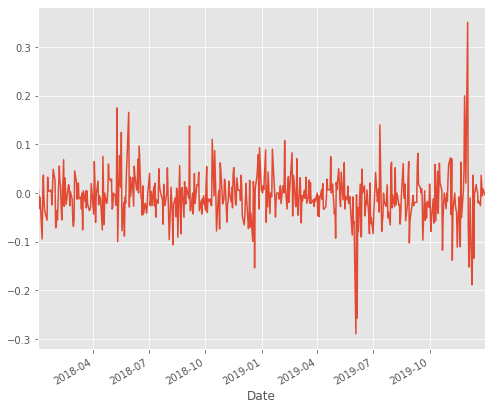

In [ ]:
#########################
# create Chart
# with Chart formatting
#########################

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

# close_px.plot(label='AGRX')
# mavg.plot(label='Adj Close')
# plt.legend()

dfMerge.PerChange.plot()

In [ ]:
dfMerge.tail()

,"(Adj Close, SRRA)","(Close, SRRA)","(High, SRRA)","(Low, SRRA)","(Open, SRRA)","(Volume, SRRA)",PerChange
Date,,,,,,,
2019-12-23,0.3380,0.3380,0.347,0.3210,0.347,1525800,-0.025937
2019-12-24,0.3420,0.3420,0.344,0.3210,0.330,1177000,0.036364
2019-12-26,0.3400,0.3400,0.344,0.3300,0.342,1040700,-0.005848
2019-12-27,0.3400,0.3400,0.345,0.3310,0.337,1350000,0.008902
2019-12-30,0.3388,0.3388,0.340,0.3253,0.340,1126159,-0.003529


In [ ]:
# Build forecast model 
# Score today, pick for tomorrow
# Place bets
# Monitor

In [ ]:
tickerSites_df

,sites,type
0,https://www.stockmonitor.com/sector/basic-mate...,basic-materials
1,https://www.stockmonitor.com/sector/communicat...,communication-services
2,https://www.stockmonitor.com/sector/consumer-c...,consumer-cyclical
3,https://www.stockmonitor.com/sector/energy/,energy
4,https://www.stockmonitor.com/sector/financial-...,financial-services
5,https://www.stockmonitor.com/sector/healthcare/,healthcare
6,https://www.stockmonitor.com/sector/industrials/,industrials
7,https://www.stockmonitor.com/sector/technology/,technology
8,https://www.stockmonitor.com/sector/utilities/,utilities


In [ ]:
tickerSites_df['sites'][0]

'https://www.stockmonitor.com/sector/basic-materials/'

In [ ]:
# dfs = pd.read_html(tickerSites_df['sites'][0], header=0)


In [ ]:
# dfs

In [ ]:
# df = []

In [ ]:
df = []
dfs = pd.read_html(tickerSites_df['sites'][0], header=0)
for df in dfs:
    # print(df)
    df['type'] = tickerSites_df['type'][0]

In [ ]:
df

,Change%,Company,Company.1,Price,Volume,Low,High,type
0,▲ 2.23%,AEM,Agnico Eagle Mines Limited,70.220,16101,70.035,70.220,basic-materials
1,▲ 1.66%,APD,"Air Products and Chemicals, Inc",269.800,66611,268.420,270.110,basic-materials
2,▲ 2.73%,AGI,Alamos Gold Inc,9.040,60258,9.040,9.055,basic-materials
3,▲ 1.45%,ALB,Albemarle Corporation,136.525,38073,136.000,136.700,basic-materials
4,▲ 2.34%,AA,Alcoa Corporation,22.270,26989,22.140,22.270,basic-materials
...,...,...,...,...,...,...,...,...
101,▲ 0.90%,VMC,Vulcan Materials Company,136.660,7828,136.660,136.660,basic-materials
102,▲ 0.50%,WDFC,WD-40 Company,261.850,375,261.850,261.850,basic-materials
103,▲ 0.42%,WLK,Westlake Chemical Corporation,81.620,1634,81.620,82.100,basic-materials
104,▲ 1.51%,GRA,W. R. Grace & Co,54.570,1529,54.570,54.570,basic-materials


In [ ]:
tickerSites_df.shape[0]

9

In [ ]:
df = pd.read_html(tickerSites_df['sites'][0])

In [ ]:
df['type'] = tickerSites_df['type'][0]

In [ ]:
df_out.shape

(3636, 8)

In [ ]:
df_out

,Change%,Company,Company.1,Price,Volume,Low,High,type
0,▲ 2.10%,AEM,Agnico Eagle Mines Limited,70.135,75651,69.96,70.480,basic-materials
1,▲ 1.50%,APD,"Air Products and Chemicals, Inc",269.370,117050,268.42,270.350,basic-materials
2,▲ 3.52%,AGI,Alamos Gold Inc,9.110,308026,9.04,9.110,basic-materials
3,▲ 0.38%,ALB,Albemarle Corporation,135.080,127882,135.08,137.650,basic-materials
4,▲ 1.98%,AA,Alcoa Corporation,22.190,467655,22.09,22.525,basic-materials
...,...,...,...,...,...,...,...,...
84,▲ 0.43%,UGI,UGI Corporation,35.130,24620,34.94,35.145,utilities
85,▼ -0.09%,UTL,Unitil Corporation,42.520,1068,42.52,42.820,utilities
86,▲ 0.36%,VST,Vistra Energy Corp,18.205,125726,18.16,18.280,utilities
87,▲ 0.46%,WEC,"WEC Energy Group, Inc",92.000,73621,91.22,92.170,utilities


In [ ]:
df_out[df_out['Company'] == 'TSLA']

,Change%,Company,Company.1,Price,Volume,Low,High,type
333,▲ 0.48%,TSLA,"Tesla, Inc",642.93,6050556,634.73,646.83,consumer-cyclical


In [ ]:
df.head(5)

,Change%,Company,Company.1,Price,Volume,Low,High,type
0,▲ 4.42%,VNET,"21Vianet Group, Inc",29.885,2154424,28.640,30.340,sector/utilities
1,▲ 4.44%,DDD,3D Systems Corporation,10.340,1649841,10.090,10.450,sector/utilities
2,▼ -4.25%,EGHT,"8x8, Inc",30.045,4352316,28.845,30.280,sector/utilities
3,▼ -6.52%,JFU,9F Inc,1.290,1527916,1.230,1.330,sector/utilities
4,▲ 2.45%,ATEN,"A10 Networks, Inc",8.145,725864,8.040,8.275,sector/utilities
